![CC-BY-SA](https://mirrors.creativecommons.org/presskit/buttons/88x31/svg/by-sa.svg)
This notebook was created by [Bernardo Freitas Paulo da Costa](http://www.im.ufrj.br/bernardofpc),
and is licensed under Creative Commons BY-SA

# Implementando a 2ª parte da Lista 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Primeiro, uma função para calcular o vetor $w$ de pesos

Em função dos nós $xs \subset [-1,1]$.

In [2]:
def build_M(xs):
    """Matriz com as equações, como para interpolação de Lagrange."""
    ### Resposta aqui


In [3]:
my_xs = [-0.7,-0.3, 0.3, 0.7]
build_M(my_xs)

[array([ 1.,  1.,  1.,  1.]),
 array([-0.7, -0.3,  0.3,  0.7]),
 array([ 0.49,  0.09,  0.09,  0.49]),
 array([-0.343, -0.027,  0.027,  0.343])]

In [4]:
def find_w(xs):
    """E a função que calcula os pesos w"""
    ### Resposta aqui


In [5]:
find_w(my_xs)

array([ 0.60833333,  0.39166667,  0.39166667,  0.60833333])

In [6]:
def integrator(f,a,b,n,xs,w):
    """Calcula a integral de f, no intervalo [a,b]:
    - dividindo em n sub-intervalos
    - em cada um, aplicando uma regra vinda dos pontos xs.

    O vetor de pesos w evita calcular todas as vezes que o método for aplicado."""
    ts, h = np.linspace(a,b,num=n, endpoint=False, retstep=True)
    ### Resposta aqui


Um teste...

In [7]:
integrator(np.sin, 0,1, 20, my_xs, find_w(my_xs))

0.45969769375199265

In [8]:
def make_int_int(xs):
    """Retorna uma "função integradora" com os pontos xs. """
    w = find_w(xs)
    def int_int(f,a,b,n):
        return integrator(f,a,b,n,xs,w)
    return int_int

In [9]:
def cheby_nodes(n):
    """n pontos de Chebychev"""
    ### Resposta aqui


In [10]:
cheby_nodes(6)

array([ 0.96592583,  0.70710678,  0.25881905, -0.25881905, -0.70710678,
       -0.96592583])

## Testes e gráficos

In [11]:
f4 = make_int_int(my_xs)
f6 = make_int_int([-0.8, -0.5, -0.2, 0.2, 0.5, 0.8])
f6c = make_int_int(cheby_nodes(6))
f10 = make_int_int(cheby_nodes(10))

In [12]:
f4(np.sin, 0, 1, 10) - (1 - np.cos(1))

-6.0792512135421362e-09

In [13]:
ns = np.arange(2,100,2, dtype=int)
Is = {}
funs, names = [f4,f6,f6c,f10], ['f4','f6','f6c','f10']
for f, name in zip(funs, names):
    Is[name] = np.array([f(np.sin, 0, 10, n) for n in ns])

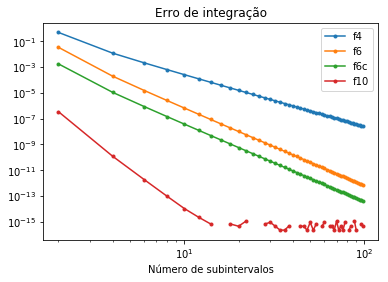

In [14]:
ans = 1 - np.cos(10)
for f, name in zip(funs, names):
    plt.loglog(ns, np.abs(Is[name] - ans), '.-', label=name)
plt.xlabel('Número de subintervalos')
plt.title('Erro de integração')
plt.legend()
plt.show()

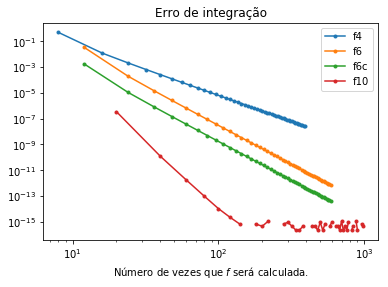

In [15]:
for f, name, order in zip(funs, names, [4,6,6,10]):
    plt.loglog(order*ns, np.abs(Is[name] - ans), '.-', label=name)
plt.xlabel('Número de vezes que $f$ será calculada.')
plt.title('Erro de integração')
plt.legend()
plt.show()